In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd as xlrd


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
DATA_FILE = 'C:/Users/Paparn/Desktop/height_weight.xlsx'
x = 'height'
y = 'weight'

In [3]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
male = np.asarray([sheet.row_values(i) for i in range(1, 5001)])
female = np.asarray([sheet.row_values(i) for i in range(5001, 10001)])
n_samples = 5000

In [4]:
def Gradient(data,name):
        
    # Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
    X = tf.placeholder(tf.float32, name='X')
    Y = tf.placeholder(tf.float32, name='Y')
    
    # Step 3: create weight and bias, initialized to 0
    w = tf.Variable(0.0, name='weights')
    b = tf.Variable(0.0, name='bias')
    
    # Step 4: build model to predict Y
    Y_predicted = X * w + b 
    
    # Step 5: use the square error as the loss function
    loss = tf.square(Y - Y_predicted, name='loss')
    # loss = utils.huber_loss(Y, Y_predicted)
    
    # Step 6: using gradient descent with learning rate of 0.01 to minimize loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00000001).minimize(loss)
    with tf.Session() as sess:
        # Step 7: initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer()) 
        
        writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
        
        # Step 8: train the model
        e = 100
        tmp = 0
        total_loss = 0
        i = 0
        while e > 0.0001:
             tmp = total_loss
             total_loss = 0
             for x,y in data:
    # Session runs train_op and fetch values of loss
                _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
                total_loss += l
             e = abs(total_loss - tmp)/n_samples
             i += 1
             if i > 100:
                 break
             print('Epoch {0}: {1}\t e = {2}'.format(i, total_loss/n_samples,e))
    
    # close the writer when you're done using it
        writer.close() 
    
    # Step 9: output the values of w and b
        w, b = sess.run([w, b])
        
    
    # plot the results
    X, Y = data.T[0], data.T[1]
    str_ = 'Predicted data w=' + str(w) + ', b=' + str(b)
    plt.figure(name)
    plt.plot(X, Y, 'bo', label='Real data')
    plt.plot(X, X * w + b, 'r', label=str_)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend()
    plt.show()

In [5]:
def Adam(data,name):
        
    # Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
    X = tf.placeholder(tf.float32, name='X')
    Y = tf.placeholder(tf.float32, name='Y')
    
    # Step 3: create weight and bias, initialized to 0
    w = tf.Variable(0.0, name='weights')
    b = tf.Variable(0.0, name='bias')
    
    # Step 4: build model to predict Y
    Y_predicted = X * w + b 
    
    # Step 5: use the square error as the loss function
    loss = tf.square(Y - Y_predicted, name='loss')
    # loss = utils.huber_loss(Y, Y_predicted)

    # Step 6: using gradient descent with learning rate of 0.01 to minimize loss
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)
    with tf.Session() as sess:
        # Step 7: initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer()) 
        
        writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
        
        # Step 8: train the model
        e = 100
        tmp = 0
        total_loss = 0
        i = 0
        while e > 0.1:
             tmp = total_loss
             total_loss = 0
             for x,y in data:
    # Session runs train_op and fetch values of loss
                _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
                total_loss += l
             e = abs(total_loss - tmp)/n_samples
             i += 1
             if i > 100:
                 break
             print('Epoch {0}: {1}\t e = {2}'.format(i, total_loss/n_samples,e))
    
    # close the writer when you're done using it
        writer.close() 
    
    # Step 9: output the values of w and b
        w, b = sess.run([w, b])
        
    
    # plot the results
    X, Y = data.T[0], data.T[1]
    str_ = 'Predicted data w=' + str(w) + ', b=' + str(b)
    plt.figure(name)
    plt.plot(X, Y, 'bo', label='Real data')
    plt.plot(X, X * w + b, 'r', label=str_)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend()
    plt.show()

Epoch 1: 22854.62065825195	 e = 22854.62065825195
Epoch 2: 8912.407957019042	 e = 13942.212701232911
Epoch 3: 3545.779109808071	 e = 5366.628847210972
Epoch 4: 1479.9029336333297	 e = 2065.8761761747414
Epoch 5: 684.5901138340436	 e = 795.3128197992861
Epoch 6: 378.3714181651951	 e = 306.21869566884845
Epoch 7: 260.449427143738	 e = 117.92199102145717
Epoch 8: 215.02024700080858	 e = 45.42918014292936
Epoch 9: 197.50691798696243	 e = 17.513329013846164
Epoch 10: 190.74836531483112	 e = 6.758552672131313
Epoch 11: 188.13543722434278	 e = 2.612928090488352
Epoch 12: 187.12293030757257	 e = 1.0125069167701992
Epoch 13: 186.72961428490356	 e = 0.3933160226690117
Epoch 14: 186.57530241978117	 e = 0.15431186512238346
Epoch 15: 186.51420498982236	 e = 0.06109742995882407
Epoch 16: 186.48968989819917	 e = 0.024515091623179615
Epoch 17: 186.47969990069717	 e = 0.009989997501997278
Epoch 18: 186.4754339292535	 e = 0.00426597144366242
Epoch 19: 186.4734685915515	 e = 0.0019653377020265907
Epoch 2

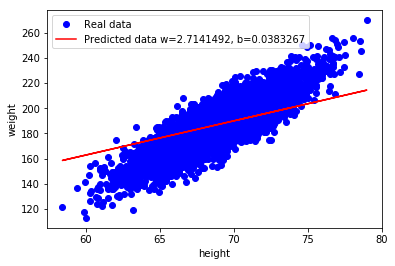

Epoch 1: 12944.470358862305	 e = 12944.470358862305
Epoch 2: 5852.790076004028	 e = 7091.680282858277
Epoch 3: 2709.575839989981	 e = 3143.2142360140474
Epoch 4: 1316.5641873866805	 e = 1393.0116526033007
Epoch 5: 699.3097631816792	 e = 617.2544242050012
Epoch 6: 425.8773574177997	 e = 273.43240576387944
Epoch 7: 304.80164178183065	 e = 121.07571563596908
Epoch 8: 251.21765842967136	 e = 53.58398335215929
Epoch 9: 227.51877460915023	 e = 23.698883820521132
Epoch 10: 217.0573418825619	 e = 10.461432726588333
Epoch 11: 212.4454930018661	 e = 4.611848880695784
Epoch 12: 210.41951115877214	 e = 2.025981843093969
Epoch 13: 209.53255561044762	 e = 0.886955548324529
Epoch 14: 209.1476198823557	 e = 0.38493572809188625
Epoch 15: 208.98210320064393	 e = 0.16551668171179482
Epoch 16: 208.91247454010667	 e = 0.06962866053725593
Epoch 17: 208.8839752324875	 e = 0.028499307619174942
Epoch 18: 208.87282230122742	 e = 0.011152931260084733
Epoch 19: 208.8689957277571	 e = 0.0038265734703280033
Epoch 2

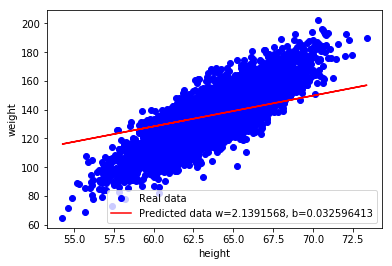

Epoch 1: 29377.82525703125	 e = 29377.82525703125
Epoch 2: 19126.181014111327	 e = 10251.644242919921
Epoch 3: 11215.188141137696	 e = 7910.992872973633
Epoch 4: 5559.198030462647	 e = 5655.9901106750485
Epoch 5: 2067.978419674301	 e = 3491.2196107883456
Epoch 6: 512.0669983308646	 e = 1555.9114213434364
Epoch 7: 201.3437649685419	 e = 310.7232333623228
Epoch 8: 188.72582733344416	 e = 12.617937635097746
Epoch 9: 188.57393439238825	 e = 0.15189294105591253
Epoch 10: 188.55923029204882	 e = 0.01470410033944063


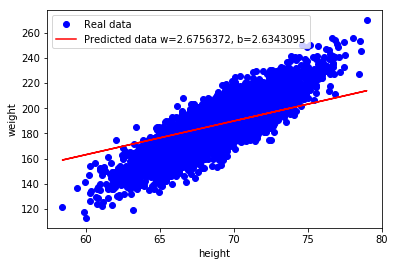

Epoch 1: 14883.281266137696	 e = 14883.281266137696
Epoch 2: 8503.743764691162	 e = 6379.5375014465335
Epoch 3: 4068.4648937137604	 e = 4435.278870977401
Epoch 4: 1448.7315137285416	 e = 2619.733379985219
Epoch 5: 391.27898684531283	 e = 1057.4525268832288
Epoch 6: 216.57383922438737	 e = 174.70514762092546
Epoch 7: 210.73611300815665	 e = 5.8377262162307275
Epoch 8: 210.73368564156726	 e = 0.002427366589382291


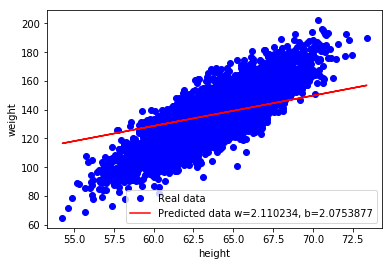

In [6]:
Gradient(male,'male_Gradient')
Gradient(female,'female_Gradient')
Adam(male,'male_Adam')
Adam(female,'female_Adam')